(C:laplace)=
# Transformée de Laplace

La transformée de Fourier d'un signal ne peut se calculer que si le signal est d'intégrale sommable
(c'est-à-dire que son intégrale ne tend pas vers l'infini).
Or, la réponse impulsionnelle d'un système instable peut tendre vers l'infini,
emêchant donc le calcul de sa transformée de Fourier, qui correspond à sa réponse fréquentielle.
Dans ce cas, on utilise la transformée de Laplace.

## Définition

La transformée de Laplace d'un signal à temps continu $x(t)$ est :

$$
X(s) = \int_{-\infty}^{+\infty} x(t) e^{-st} dt
$$

où $s = \sigma + j\omega$ est la variable (complexe) de Laplace.
Cette formule est très semblable à la transformée de Fourier,
à la différence que l'imaginaire pur $j2\pi f$ de la transformée de Fourier
est remplacé par le complexe $s$ de la transformée de Laplace.

On notera dans la suite : $X(s) = \mathcal{L}[x(t)]$.

Dans le cadre du filtrage, la transformée de Laplace $H(s)$ de la réponse impulsionnelle $h(t)$ d'un filtre analogique
est appelée « fonction de transfert » (_transfer function_).
Elle correspond au quotient entre les transformées de Laplace de la sortie et de l'entrée :

$$
H(s) = \frac{Y(s)}{X(s)}.
$$

(S:laplace:pz)=
## Diagramme pôles–zéros

La transformée de Laplace est une fonction complexe (à cause de la présence de l'exponentielle complexe)
d'une variable complexe ($s$ est complexe).
Pour la représenter, il faudrait donc quatre dimensions !
C'est bien sûr trop compliqué.
D'ailleurs, il n'y aurait pas de réel intérêt à la représenter.
Juste pour la curiosité, la transformée de Laplace de $e^{-at} \cos(bt) u(t)$ est représentée {numref}`F:laplace:laplace4d`.
Vous conviendrez que ce n'est pas simple à interpréter !

```{figure} _static/figs/laplace4d.png
---
height: 250px
name: F:laplace:laplace4d
---
Représentation 3D du module et de l'argument de la tranformée de Laplace de $e^{-at} \cos(bt) u(t)$.
```

À la place, on utilise une représentation schématique de la transformée de Laplace : le diagramme pôles–zéros (_pole–zero plot_).
Celui-ci est une représentation des singularités de la transformée de Laplace :
* les lieux où elle tend vers zéro sont représentés par des $\circ$ et sont appelés à juste titre « zéros »,
* les lieux où elle tend vers $\pm \infty$ sont représentés par des $\times$ et sont appelés « pôles ».

La {numref}`F:laplace:diagrammepz` représente le diagramme pôles–zéros de $e^{-at} \cos(bt) u(t)$.
Cette fois-ci, cette représentation est simple à interpréter !

```{glue:figure} G:laplace:diagrammepz
:name: "F:laplace:diagrammepz"

Diagramme pôles–zéros et région de convergence du système de réponse impulsionnelle $h(t) = e^{-at} \cos(bt) u(t)$
(ici, $a=1$ et $b=2\pi$).
```

Dans certaines conditions (liées à la région de convergence que l'on verra plus loin),
la transformée de Fourier est égale à la transformée de Laplace pour $\sigma=0$,
ce qui correspond à l'axe de imaginaires purs (l'axe vertical sur le diagramme pôles–zéros).
Pour le signal $e^{-at} \cos(bt) u(t)$, la transformée de Fourier est matérialisée
sur les {numref}`F:laplace:laplace4d` (en noir) et {numref}`F:laplace:diagrammepz` (en orange).

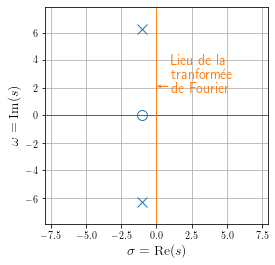

In [1]:
# Diagramme pôlez-zéros et ROC de exp(-at) × cos(bt) × u(t)

import math
import numpy as np
import scipy.signal as sig
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from myst_nb import glue

matplotlib.rcParams['text.usetex'] = True

lim = 7.9

a = 1
b = 2*math.pi
z, p, k = sig.tf2zpk([1, a], [1, 2*a, a**2+b**2])

fig = plt.figure(figsize=(4,4))
ax = plt.subplot()

# Axes
plt.plot([-lim, lim], [0, 0], "k", linewidth=.5)

# # ROC
# ax.fill([-a, -a, lim, lim], [-lim, lim, lim, -lim], fill=False, hatch='\\', color="silver")
# plt.text(1.1, -1.6, "ROC", color="silver", size=20)

# Pôles
plt.plot(np.real(p), np.imag(p), "x", color="tab:blue", markersize=10)

# Zéros
plt.plot(np.real(z), np.imag(z), "o", color="tab:blue", fillstyle="none", markersize=10)

# TF
plt.plot([0, 0], [-lim, lim], "tab:orange", linewidth=1)
plt.arrow(.8, 2.1, -.5, 0, color="tab:orange", head_width=0.15)
plt.text(1, 1.65, "Lieu de la\ntranformée\nde Fourier", color="tab:orange", size=14)

plt.grid()
plt.axis([-lim, lim, -lim, lim])
plt.xlabel(r"$\sigma = \mathrm{Re}(s)$", size=14)
plt.ylabel(r"$\omega = \mathrm{Im}(s)$", size=14)

glue("G:laplace:diagrammepz", fig, display=False)

(S:laplace:inverse)=
## Transformée inverse

La transformée de Laplace inverse de $X(s)$ est :

$$
x(t) = \frac{1}{2\pi j} \int X(s) e^{+st} ds.
$$

Le calcul de cette intégrale s'effectue en intégrant le long d'un contour dans le plan complexe en s.
C'est un calcul compliqué qui nécessite des notions que nous n'aborderons pas dans ce cours,
tel que le [théorème des résidus](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_des_r%C3%A9sidus).

```{margin}
Une fraction rationelle est une fraction entre deux polynômes.
```

Or, la plupart des transformées de Laplace s'écrivent sous forme d'une fraction rationnelle,
leur inverse peut être calculée à l'aide d'une décomposition en éléments simples
(_partial fraction expansion_ ; voir le cours de mathématiques ou d'automatique).
On utilise ensuite des [tables](https://en.wikipedia.org/wiki/List_of_Laplace_transforms#Table)
pour obtenir l'expression de la transformée inverse.

Les transformées de Laplace s'écrivent donc dans la plupart des cas sous la forme :

$$
H(s) = \frac{ \sum_{n=0}^N b_n s^n }{ \sum_{n=0}^M a_m s^m }
     = \frac{ b_Ns^N + b_{N-1}s^{N-1} + \dots + b_1s + b_0 }{ a_Ms^M + a_{M-1}s^{M-1} + \dots + a_1s + a_0 }
$$

où les constantes $b_n$ et $a_m$ sont les coefficients de la fonction de transfert $H(s)$.
Avec un peu de calcul, l'expression précédente peut aussi d'écrire sous la forme :

$$
H(s) = k \frac{ \prod_{n=0}^N (s-z_n) }{ \prod_{n=0}^M (s-p_m) }
     = k \frac{ (s-z_M)(s-z_{M-1}) \dots (s-z_1)(s-z_0) }{ (s-p_M)(s-p_{M-1}) \dots (s-p_1)(s-p_0) }
$$

où les constantes $z_n$ et $p_m$ sont respectivement les zéros et les pôles de la fonction de transfert $H(s)$
et $k$ est une constante multiplicative appelée gain.
Les zéros $z_n$ annulent le numérateur de la fonction de transfert (et donc la fonction de transfert elle-même),
tandis que les pôles $p_m$ annulent le dénumérateur (et font tendre la fonction de transfert vers l'infini).

La constante $M$ correspond au nombre de pôles et définit l'« ordre » de la fonction de transfert.

## Propriétés

Les propriétés de la transformée de Laplace sont similaires à celles de la transformée de Fourier.
On note $a$ et $b$ deux constantes, $x$, $x_1$ et $x_2$ des signaux
et $X$, $X_1$ et $X_2$ leurs transformées de Laplace respectives.

* Linéarité :
  
  $$
  ax_1(t) + bx_2(t)
  \quad\xrightarrow{\quad\mathcal{L}\quad}\quad
  a X_1(s) + b X_2(s)
  $$

* Translation :

  $$
  x(t-T)
  \quad\xrightarrow{\quad\mathcal{L}\quad}\quad
  e^{-sT} X(s)
  $$

* Convolution :

  $$
  (x_1*x_2)(t)
  \quad\xrightarrow{\quad\mathcal{L}\quad}\quad
  X_1(s) \times X_2(s)
  $$

* Dérivée temporelle :

  $$
  \frac{d}{dt}x(t)
  \quad\xrightarrow{\quad\mathcal{L}\quad}\quad
  s X(s)
  $$

* Dilatation :

  $$
  x(at)
  \quad\xrightarrow{\quad\mathcal{L}\quad}\quad
  \frac{1}{|a|} X\left(\frac{s}{a}\right)
  $$

## Région de convergence et stabilité

La région de convergence (ROC, pour _region of convergence_) définit la partie du plan en $z$
pour laquelle le système étudié est stable.

Prenons l'exemple de la réponse impulsionnelle $h(t) = e^{-at} u(t)$.
Elle est suffisamment simple pour que l'on identifie rapidement la zone de stabilité du système.
La {numref}`F:laplace:ri` représente cette réponse impulsionnelle pour plusieurs valeur de $a$ :
On constate que lorsque $a>0$ alors le système revient à sa position d'équilibre,
alors que si $a<0$ le système est instable.

```{glue:figure} G:laplace:ri
:name: "F:laplace:ri"

Réponse impulsionnelle $h(t) = e^{-at} u(t)$ pour plusieurs valeurs de $a$.
```

La fonction de transfert de ce système est :

$$
H(s) &= \int_{-\infty}^{+-\infty} h(t) e^{-st} dt \\
     &= \int_{0}^{+-\infty} e^{-at} e^{-st} dt \\
     &= \left[ \frac{e^{-t(s+a)}}{-(s+a)} \right]_{0}^{+-\infty} \\
     &= \frac{\lim_{t \to +\infty} e^{-t(s+a)} - 1}{-(s+a)}
$$

Avant de déterminer la valeur de la limite de $e^{-t(s+a)}$ en $+\infty$,
rappelons que $s$ est complexe et s'écrit $s=\sigma+j\omega$.
Donc l'exponentielle $e^{-t(s+a)}$ se décompose en deux exponentielles :

$$
e^{-t(s+a)} = e^{-t(\sigma+j\omega+a)} = e^{-t(\sigma+a)} e^{-j\omega t}.
$$

Lorsque $t$ tend vers l'infini, $e^{-j\omega t}$ ne diverge pas
(souvenez-vous que [l'expontielle complexe a une forme de tire-bouchon](https://vincmazet.github.io/signal1/signaux-elementaires.html#exponentielle-complexe)).
En ce qui concerne l'exponentielle réelle $e^{-t(\sigma+a)}$, trois cas sont possibles :
* si $s+a > 0$ alors $e^{-t(\sigma+a)}$ est une exponentielle décroissante et tend vers 0,
* si $s+a = 0$ alors $e^{-t(\sigma+a)}$ est une constante égale à 1,
* si $s+a < 0$ alors $e^{-t(\sigma+a)}$ est une exponentielle croissante et tend vers l'infini.

En combinant les limites des deux exponentielles, il advient que si et seulement si $s+a > 0$ alors $e^{-t(s+a)}$ converge
(vers zéro).
On peut donc continuer le calcul de la fonction de transfert, uniquement dans le cs $s+a > 0$ :

$$
H(s) = \frac{0 - 1}{-(s+a)} = \frac{1}{s+a}
$$

On a donc obtenu l'expression de la fonction de transfert du système étudié,
qui n'est vraie que dans le cas où $s+a > 0$.

Cette condition ($s+a > 0$, ou autrement $s>-a$) définit la région de convergence du système.
On peut donc la représenter sur le diagramme pôles–zéros ({numref}`F:laplace:pz`).

```{glue:figure} G:laplace:pz
:name: "F:laplace:pz"

Diagramme pôles–zéros et région de convergence du système de réponse impulsionnelle $h(t) = e^{-at} u(t)$
(ici, $a=1.5$).
```

On remarque par ailleurs que $-a$ est l'unique pôle de la fonction de de transfert $H(s)$ (qui n'a d'ailleurs pas de zéros).
Dans l'exemple de la {numref}`F:laplace:pz` où $a=1,5$,
le lieu de la transformée de Fourier étant intégralement dans la région de convergence,
on en déduit que le système est stable.

De manière générale, on montre qu'un système analogique est stable
si et seulement si tous ses pôles sont à partie réelle négative,
impliquant qu'ils sont tous situés à gauche de l'axe vertical du diagramme pôles–zéros.

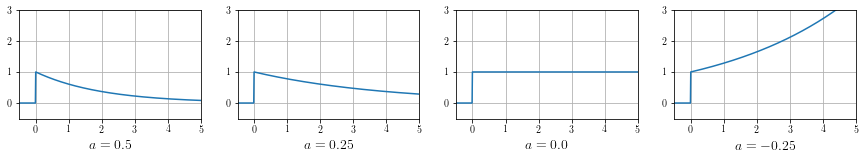

In [2]:
# Réponse impulsionnelle exp(-at) × u(t)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from myst_nb import glue

matplotlib.rcParams['text.usetex'] = True

def h(t, a):
    return np.where( t>=0, np.exp(-a*t), 0)

t = np.arange(-1, 6, .01)
fig = plt.figure(figsize=(15,2))
i=0
for a in np.arange(.5, -.5, -.25):
    i+=1
    plt.subplot(1,4,i)
    plt.plot(t, h(t,a))
    plt.axis([-.5, 5, -.5, 3])
    plt.grid()
    plt.xlabel(f"$a={a}$", size=14)

glue("G:laplace:ri", fig, display=False)

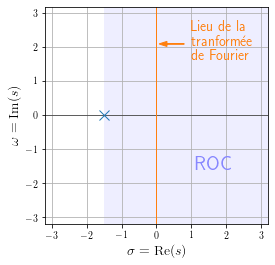

In [3]:
# Diagramme pôlez-zéros et ROC de exp(-at) × u(t)

import numpy as np
import scipy.signal as sig
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from myst_nb import glue

matplotlib.rcParams['text.usetex'] = True

lim = 3.2

a = 1.5
z, p, k = sig.tf2zpk([1], [1, a])

fig = plt.figure(figsize=(4,4))
ax = plt.subplot()

# Axes
plt.plot([-lim, lim], [0, 0], "k", linewidth=.5)

# ROC
ax.fill([-a, -a, lim, lim], [-lim, lim, lim, -lim], color="#eeeeff")
plt.text(1.1, -1.6, "ROC", color="#8888ff", size=20)

# Pôles
plt.plot(np.real(p), np.imag(p), "x", color="tab:blue", markersize=10)

# Zéros
plt.plot(np.real(z), np.imag(z), "o", color="tab:blue", fillstyle="none", markersize=10)

# TF
plt.plot([0, 0], [-lim, lim], "tab:orange", linewidth=1)
plt.arrow(.8, 2.1, -.5, 0, color="tab:orange", head_width=0.15)
plt.text(1, 1.65, "Lieu de la\ntranformée\nde Fourier", color="tab:orange", size=14)

plt.grid()
plt.axis([-lim, lim, -lim, lim])
plt.xlabel(r"$\sigma = \mathrm{Re}(s)$", size=14)
plt.ylabel(r"$\omega = \mathrm{Im}(s)$", size=14)

glue("G:laplace:pz", fig, display=False)